In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [58]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [59]:
df.columns = ["Name", "Age", "Income"]

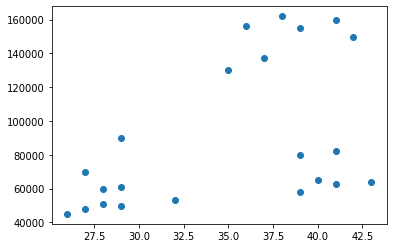

In [60]:
plt.scatter(df["Age"], df["Income"])
plt.show()

In [61]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
y_pred = km.fit_predict(df[["Age", "Income"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [63]:
df["Cluster"] = y_pred
df.head(3)

,Name,Age,Income,Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2


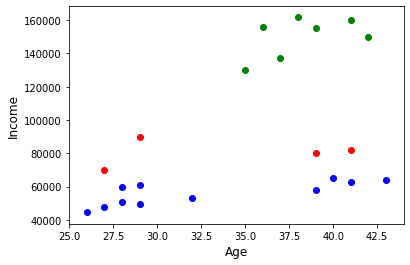

In [64]:
df0 = df[df["Cluster"]==0]
df1 = df[df["Cluster"]==1]
df2 = df[df["Cluster"]==2]

plt.scatter(df0["Age"], df0["Income"], c="red")
plt.scatter(df1["Age"], df1["Income"], c="green")
plt.scatter(df2["Age"], df2["Income"], c="blue")

plt.xlabel("Age", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.show()

As we see, the division of our data is not correct. We have to scale it - let's use the MinMaxScaler, which return values 
belong to interval **[0;1]**.

In [65]:
scaler = MinMaxScaler()
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])

scaler = MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [66]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age", "Income"]])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [67]:
df["Cluster"] = y_pred
df.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


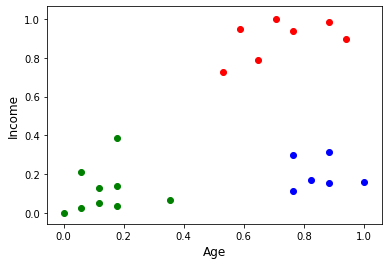

In [68]:
df0 = df[df["Cluster"]==0]
df1 = df[df["Cluster"]==1]
df2 = df[df["Cluster"]==2]

plt.scatter(df0["Age"], df0["Income"], c="red")
plt.scatter(df1["Age"], df1["Income"], c="green")
plt.scatter(df2["Age"], df2["Income"], c="blue")

plt.xlabel("Age", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.show()

Heeey! That's it!<br>
Let's visualize the centroids.

In [69]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

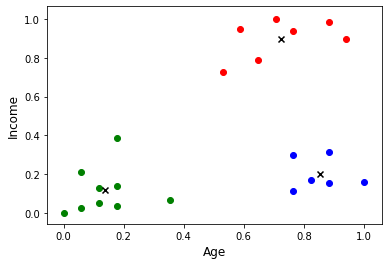

In [70]:
df0 = df[df["Cluster"]==0]
df1 = df[df["Cluster"]==1]
df2 = df[df["Cluster"]==2]

plt.scatter(df0["Age"], df0["Income"], c="red")
plt.scatter(df1["Age"], df1["Income"], c="green")
plt.scatter(df2["Age"], df2["Income"], c="blue")

# for centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', color='black')

plt.xlabel("Age", fontsize=12)
plt.ylabel("Income", fontsize=12)
plt.show()

Great! Let's calculate the optimal K value - the number of clusters. Apparently, it's 3 but let's get it mathematically.

In [71]:
print(f'The SSE: {km.inertia_}.')

The SSE: 0.4750783498553096.


In [72]:
ks = range(1,  10)
sse = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income"]])
    sse.append(km.inertia_)

In [73]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2664030124668416,
 0.21055478995472493,
 0.1735559655531264,
 0.13265419827245162,
 0.10188787724979426]

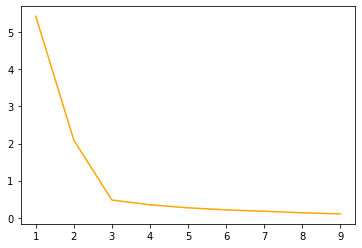

Seemingly, the elbow is the point where K is equal 3.


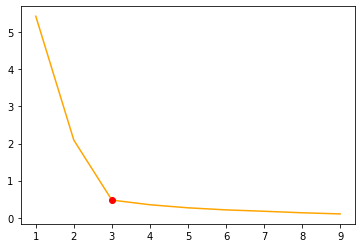

In [74]:
plt.plot(ks, sse, color='orange')
plt.show()

print("Seemingly, the elbow is the point where K is equal 3.")

plt.plot(ks, sse, color='orange')
plt.plot(ks[2], sse[2], marker='o', color="red")
plt.show()

In [75]:
import pickle
import numpy as np

with open("clustering.pkl", "rb") as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

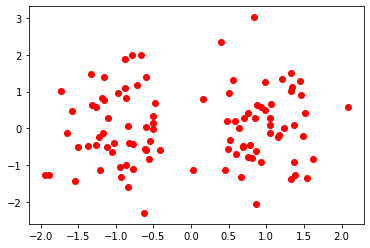

In [76]:
plt.scatter(X[:, 0], X[:, 1], c="red")
plt.show()

In [77]:
from sklearn.metrics.pairwise import euclidean_distances

In [78]:
metrics = []
MAX_CLUSTERS = 7

for cluster_num in range(1, MAX_CLUSTERS):
    km = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = km.cluster_centers_, km.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
        X[labels==centroid_label],
        centroids[centroid_label].reshape(1, -1)).sum(axis=0)[0]
        
    metrics.append(metric)
metrics


[135.92762259869988,
 92.34245055263459,
 74.52323397050206,
 60.9002322627054,
 54.86662031054899,
 49.87655589740928]

**Implementing from scratch**

In [79]:
from numpy import random

In [80]:
def euclidean_dist(x: np.array, a, b, c, d):
    """ Calculates the Euclidean distance """
    
    t1, t2 = None, None
    t1, t2 = [], []
    for i in x:
        t1.append(math.sqrt((i[0]-a)**2 + (i[1]-b)**2))
        t2.append(math.sqrt((i[0]-c)**2 + (i[1]-d)**2))
    t1, t2 = np.array(t1), np.array(t2)
    t = np.array([t1, t2])
    return t.T

In [81]:
def kmeans(X):
    """ The structure with the initialization and the whole iteration concept """
    
    n = 2  # the number of clusters
    centroids = np.random.sample((n, 2))

    plt.scatter(X[:, 0], X[:, 1], c=['green' if i==1 else 'yellow' for i in Y])
    plt.plot(centroids[0, 0], centroids[0, 1], marker='o', c="red")
    plt.plot(centroids[1, 0], centroids[1, 1], marker='o', c="red")
    plt.show()

    a, b = centroids[0, 0]+1, centroids[0, 1]+1
    iter = 0
    
    while (a!=centroids[0, 0]) & (b!=centroids[0, 1]):
        iter += 1
        a, b = centroids[0, 0], centroids[0, 1] 
        ed = euclidean_dist(X, centroids[0, 0], centroids[0, 1], centroids[1, 0], centroids[1, 1])
        cluster1 = X[ed[:,0] < ed[:,1]]
        cluster2 = X[ed[:,0] >= ed[:,1]]
    
        centroids[0, 0] = np.median(cluster1[:, 0])
        centroids[0, 1] = np.median(cluster1[:, 1])
        centroids[1, 0] = np.median(cluster2[:, 0])
        centroids[1, 1] = np.median(cluster2[:, 1])

        plt.scatter(cluster1[:, 0], cluster1[:, 1], c="yellow")
        plt.scatter(cluster2[:, 0], cluster2[:, 1], c="green")
        plt.plot(centroids[0, 0], centroids[0, 1], marker='o', c="red")
        plt.plot(centroids[1, 0], centroids[1, 1], marker='o', c="red")
        plt.show()
    return iter

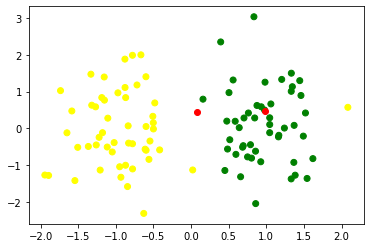

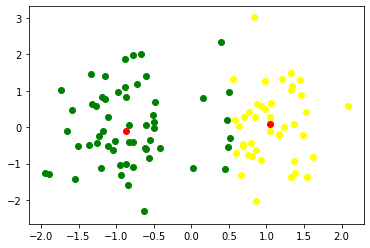

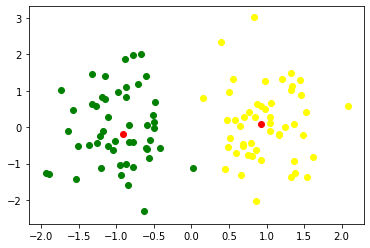

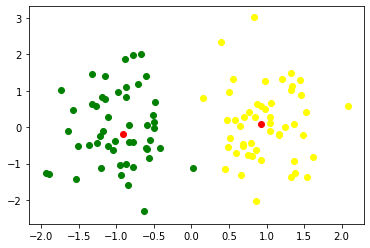

The K-means has been completed for 3 iterations.


In [84]:
iter = kmeans(X)

print(f'The K-means has been completed for {iter} iterations.')

Yeaaaah! That's it 😎😎